In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
# Step 1: Data Preparation
data = pd.read_csv('Churn_Modelling.csv')
X = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = data['Exited']
X_encoded = pd.get_dummies(X)

In [15]:
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [16]:
# Step 3: Model Selection and Training (using only training data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
logistic_regression.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier()

In [17]:
# Step 4: Model Evaluation (using only testing data)
y_pred_lr = logistic_regression.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_gb = gradient_boosting.predict(X_test)

print("Logistic Regression Accuracy (Testing Data):", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy (Testing Data):", accuracy_score(y_test, y_pred_rf))
print("Gradient Boosting Accuracy (Testing Data):", accuracy_score(y_test, y_pred_gb))

print("Logistic Regression Report (Testing Data):\n", classification_report(y_test, y_pred_lr))
print("Random Forest Report (Testing Data):\n", classification_report(y_test, y_pred_rf))
print("Gradient Boosting Report (Testing Data):\n", classification_report(y_test, y_pred_gb))

Logistic Regression Accuracy (Testing Data): 0.811
Random Forest Accuracy (Testing Data): 0.862
Gradient Boosting Accuracy (Testing Data): 0.8645
Logistic Regression Report (Testing Data):
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Random Forest Report (Testing Data):
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.45      0.56       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

Gradient Boosting Report (Testing Data):
               precision    recall  f1-score   support

           0       0.

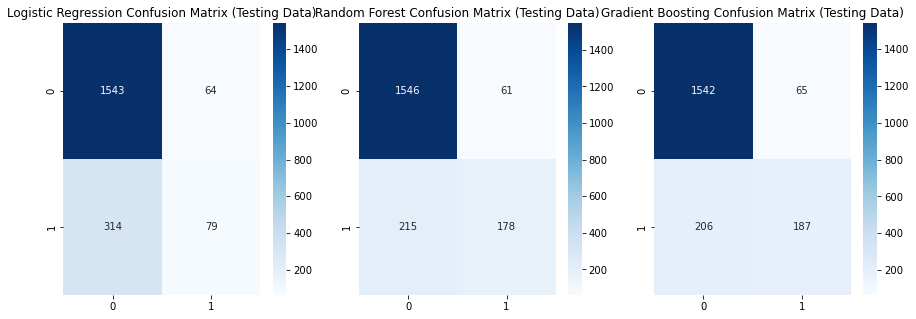

In [18]:
# Step 5: Visualize the model performance on testing data (confusion matrices)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Confusion Matrix for Logistic Regression (Testing Data)
confusion_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(confusion_lr, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Logistic Regression Confusion Matrix (Testing Data)')

# Confusion Matrix for Random Forest (Testing Data)
confusion_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(confusion_rf, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Random Forest Confusion Matrix (Testing Data)')

# Confusion Matrix for Gradient Boosting (Testing Data)
confusion_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(confusion_gb, annot=True, fmt='d', cmap='Blues', ax=ax[2])
ax[2].set_title('Gradient Boosting Confusion Matrix (Testing Data)')

plt.show()